In [3]:
import d3graph
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt

[clustimage] >INFO> NumExpr defaulting to 4 threads.


In [2]:
!pip install d3graph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.0/123.0 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.621.222118 requires jupyter-server~=1.16, but you have jupyter-server 2.6.0 which is incompatible.
jupyterlab-lsp 4.2.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
werkzeug 2.3.7 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.


In [4]:
df = pd.read_csv("/kaggle/input/renewable-energy-and-weather-conditions/solar_weather.csv")

display(df.head())

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [6]:
corr = df[df.describe().columns].corr(method = 'pearson')

In [7]:
corr

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
Energy delta[Wh],1.000000,0.914619,0.378554,0.115219,-0.544407,0.029385,-0.059881,-0.050914,-0.190241,0.526952,0.437296,0.280695,0.402523,-0.170046,-0.080877,-0.049307
GHI,0.914619,1.000000,0.492732,0.096392,-0.602186,0.017227,-0.048570,-0.051811,-0.188765,0.600326,0.540151,0.401115,0.471907,-0.163616,-0.083727,-0.039461
temp,0.378554,0.492732,1.000000,-0.066909,-0.517358,-0.080258,0.073826,-0.123244,-0.117245,0.345600,0.504449,0.706510,0.382672,-0.088711,0.104091,0.250656
pressure,0.115219,0.096392,-0.066909,1.000000,-0.120481,-0.313964,-0.201842,-0.135485,-0.263852,0.014872,0.006731,0.053127,0.001791,-0.319925,-0.002519,-0.061383
humidity,-0.544407,-0.602186,-0.517358,-0.120481,1.000000,-0.112949,0.126620,0.095623,0.285336,-0.389144,-0.598166,-0.416460,-0.527887,0.286863,-0.194924,0.117468
wind_speed,0.029385,0.017227,-0.080258,-0.313964,-0.112949,1.000000,0.123506,0.072749,0.146116,0.082700,0.054580,-0.210064,0.092661,0.193744,-0.003593,-0.045010
rain_1h,-0.059881,-0.048570,0.073826,-0.201842,0.126620,0.123506,1.000000,-0.024276,0.173332,0.045241,0.059318,0.048428,0.050164,0.330671,0.011388,0.022221
snow_1h,-0.050914,-0.051811,-0.123244,-0.135485,0.095623,0.072749,-0.024276,1.000000,0.088428,-0.023257,-0.038293,-0.109050,-0.021457,0.143205,-0.004609,-0.080668
clouds_all,-0.190241,-0.188765,-0.117245,-0.263852,0.285336,0.146116,0.173332,0.088428,1.000000,-0.002928,-0.030415,-0.234957,0.004761,0.910932,-0.019384,0.066102
isSun,0.526952,0.600326,0.345600,0.014872,-0.389144,0.082700,0.045241,-0.023257,-0.002928,1.000000,0.742715,0.270923,0.774424,0.024333,-0.150529,-0.024573


In [10]:
corr['GHI']

Energy delta[Wh]          0.914619
GHI                       1.000000
temp                      0.492732
pressure                  0.096392
humidity                 -0.602186
wind_speed                0.017227
rain_1h                  -0.048570
snow_1h                  -0.051811
clouds_all               -0.188765
isSun                     0.600326
sunlightTime              0.540151
dayLength                 0.401115
SunlightTime/daylength    0.471907
weather_type             -0.163616
hour                     -0.083727
month                    -0.039461
Name: GHI, dtype: float64

In [45]:
network = nx.Graph()

In [50]:
sources = list()
targets = list()
weights = list()

for col in corr:
    for col2 in corr:
        if col != col2:
            network.add_edge(col, col2, weight = corr[col][col2])
        sources.append(col)
        targets.append(col2)
        weights.append(100*(corr[col][col2]))

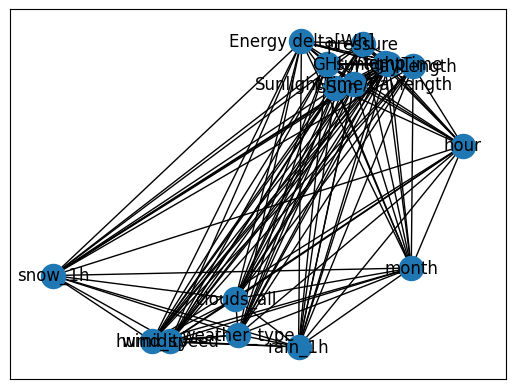

In [51]:
nx.draw_networkx(network)

In [52]:
g = d3graph.d3graph()

In [53]:
adjmat = d3graph.vec2adjmat(sources, targets, weight = weights)

In [54]:
adjmat

target,Energy delta[Wh],GHI,SunlightTime/daylength,clouds_all,dayLength,hour,humidity,isSun,month,pressure,rain_1h,snow_1h,sunlightTime,temp,weather_type,wind_speed
source,,,,,,,,,,,,,,,,
Energy delta[Wh],100.000000,91.461928,40.252334,-19.024085,28.069469,-8.087687,-54.440661,52.695193,-4.930744,11.521944,-5.988123,-5.091360,43.729571,37.855394,-17.004627,2.938466
GHI,91.461928,100.000000,47.190686,-18.876531,40.111488,-8.372706,-60.218588,60.032597,-3.946072,9.639172,-4.857018,-5.181084,54.015057,49.273177,-16.361569,1.722683
SunlightTime/daylength,40.252334,47.190686,100.000000,0.476058,20.569800,13.688931,-52.788667,77.442366,-1.865330,0.179083,5.016359,-2.145698,95.797234,38.267152,3.428346,9.266144
clouds_all,-19.024085,-18.876531,0.476058,100.000000,-23.495651,-1.938406,28.533583,-0.292768,6.610230,-26.385179,17.333193,8.842823,-3.041487,-11.724508,91.093204,14.611582
dayLength,28.069469,40.111488,20.569800,-23.495651,100.000000,-0.006214,-41.646038,27.092314,-9.098060,5.312733,4.842832,-10.905042,36.871241,70.651034,-19.464410,-21.006381
hour,-8.087687,-8.372706,13.688931,-1.938406,-0.006214,100.000000,-19.492441,-15.052874,-0.007993,-0.251853,1.138795,-0.460940,14.491934,10.409133,-1.389960,-0.359305
humidity,-54.440661,-60.218588,-52.788667,28.533583,-41.646038,-19.492441,100.000000,-38.914352,11.746796,-12.048105,12.662040,9.562346,-59.816553,-51.735794,28.686283,-11.294932
isSun,52.695193,60.032597,77.442366,-0.292768,27.092314,-15.052874,-38.914352,100.000000,-2.457327,1.487203,4.524127,-2.325740,74.271454,34.560024,2.433260,8.269960
month,-4.930744,-3.946072,-1.865330,6.610230,-9.098060,-0.007993,11.746796,-2.457327,100.000000,-6.138299,2.222110,-8.066840,-2.835535,25.065570,4.787412,-4.501005


In [55]:
g.graph(adjmat)

# g.set_node_properties(color = 'cluster',
#                       size = 10,
#                       fontsize = 12
#                      )

[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Number of unique nodes: 16


In [56]:
g.show(filepath = "/kaggle/working/Graph.html", 
       title = "")

[d3graph] INFO> Slider range is set to [0, 96]
[d3graph] INFO> Write to path: [/kaggle/working/Graph.html]
[d3graph] INFO> File already exists and will be overwritten: [/kaggle/working/Graph.html]
